# Import libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Import Dataset

In [3]:
pip install kagglehub

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("harishkumardatalab/housing-price-prediction")

print("Path to dataset files:", path)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 4.63k/4.63k [00:00<00:00, 3.15MB/s]

Extracting files...
Path to dataset files: C:\Users\Lenovo\.cache\kagglehub\datasets\harishkumardatalab\housing-price-prediction\versions\1


In [6]:
file_path = r'C:\Users\Lenovo\.cache\kagglehub\datasets\harishkumardatalab\housing-price-prediction\versions\1\housing.csv'

# Load the dataset
df = pd.read_csv(file_path)

# See the data
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


# Data Preprocessing

In [7]:
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

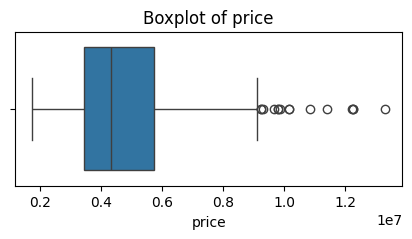

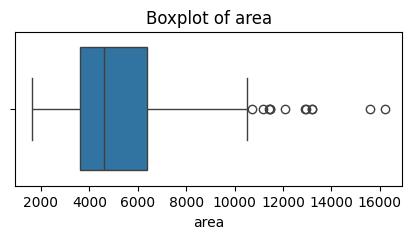

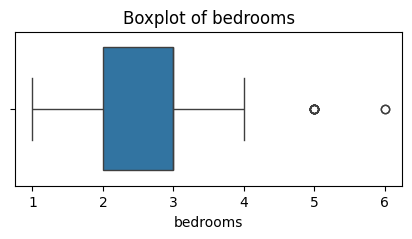

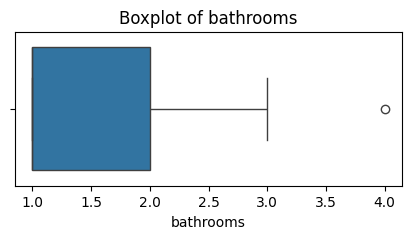

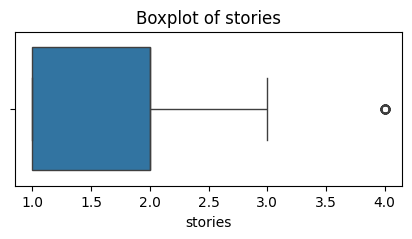

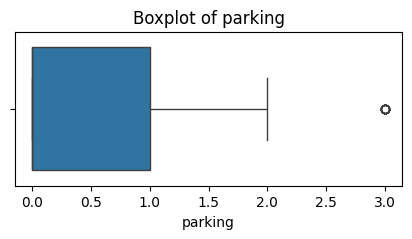

In [10]:
for col in num_cols:
    plt.figure(figsize=(5, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


# Removing Outliers

In [11]:

Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [12]:
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

<Axes: >

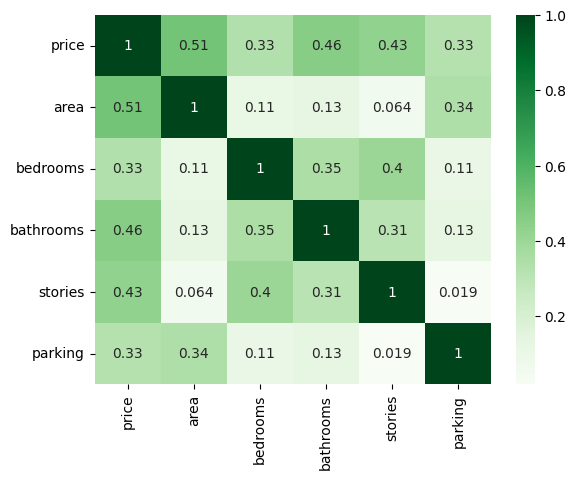

In [15]:
numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens')

# Split data into train and test sets

In [16]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking' ]
target = 'price'

In [ ]:
X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loading The Model

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

# Evaluate the model

In [20]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [21]:

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Absolute Error (MAE): 999981.0063
Mean Squared Error (MSE): 1615577176157.4915
R² Score: 0.5334


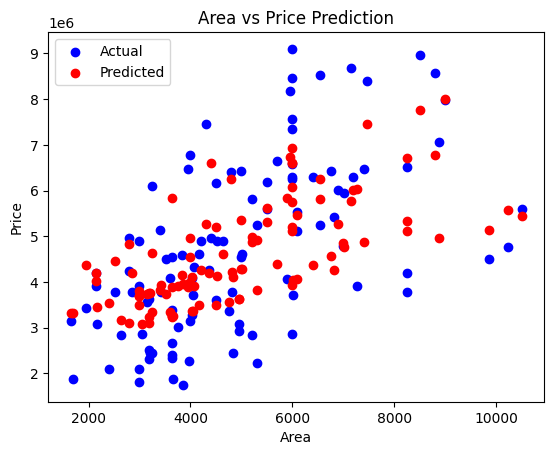

In [22]:
plt.scatter(X_test['area'], y_test, color='blue', label='Actual')
plt.scatter(X_test['area'], y_pred, color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price Prediction')
plt.legend()
plt.show()


In [23]:

coefficients = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_
})

print(coefficients)
print(f"Intercept: {model.intercept_:.4f}")


     Feature    Coefficient
0       area     287.155643
1   bedrooms  110866.815107
2  bathrooms  976606.784979
3    stories  529871.228937
4    parking  218097.942681
Intercept: 473731.4817
